=====================================================================
# <font size = 6 color='Black'><u>Market Positioning of Mobile with KNN<u> 
=====================================================================

### Abstract: 

There is a new mobile company and the CEO wants to give a tough fight to big
companies like Apple, Samsung etc. He has no idea of how to estimate the price of
mobiles his company creates. A simple assumption of the prices will not be profitthis competitive world. To solve this problem he collects sales data of mobile phovarious companies. Thus, the CEO has hired you to find out some relation betweefeatures of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price
 

### Problem Statement: 

Predict a price range, indicating how high the price is, using K-Nearest Neighbors
algorithm.  

### Dataset Information:


#### Column	=>	Description 

    battery_power	=>	Total energy a battery can store in one time measured in mAh 
    clock_speed	=>	The speed at which microprocessor executes instructions 
    fc	=>	Front Camera megapixels 
    int_memory	=>	Internal Memory in Gigabytes 
    m_dep	=>	Mobile Depth in cm 
    mobile_wt	=>	Weight of the mobile phone 
    n_cores	=>	Number of cores of a processor 
    pc	=>	Primary Camera megapixels 
    px_height	=>	Pixel Resolution Height 
    px_width	=>	Pixel Resolution Width 
    ram	=>	Random Access Memory in MegaBytes 
    sc_h	=>	Screen Height of mobile in cm 
    sc_w	=>	Screen Width of mobile in cm 
    talk_time	=>	The longest time that a single battery charge will last
    price_range	=>	This is the target variable with the value of 0(lowcost), 1(medium cost), 2(high cost), 3(veryighcost)

### Scope: 

    ● Prepare and analyse data, treat outliers and missing values
    ● Check the distribution of key numerical variables 
    ● Training a KNN with data and check it’s performance 
    ● Getting an optimized number of neighbours 

=====================================================================

## <U>Reading and Understanding the Data<U>

- Let us first import the necessary libraries like NumPy, Pandas, seaborn, matplotlib and read the dataset
- And then check the properties of the dataset.

### Importing Necessary Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data into DataFrame
import pandas as pd
# Numpy Array
import numpy as np
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# used for splitting the data
from sklearn.model_selection import train_test_split
#used for scaling the data
from sklearn.preprocessing import StandardScaler
# scikit learn KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# necessary modules for evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Reading the data

In [4]:
data = pd.read_csv(r'E:\StudyMaterial\Imarticus\PGAA 6\Exercises\KNN_LMS\Dataset\Mobile_data.csv', header = 0)

setting the value of header =0 as we have headers in the dataset

In [5]:
# Check the head of the dataset
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


### <u>Cleaning the Data<U>

We need to do some basic cleansing activity in order to feed our model the correct data.

### Examining data properties

In [6]:
print("Shape of the DataSet : ",data.shape)

Shape of the DataSet :  (2000, 15)


In [7]:
# description of the data
print("Description of the DataSet :")

Description of the DataSet :


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


#### <u>Insights</u> : 
- As seen from the dataSet info, there are no categorical variables.

In [9]:
print("* Columns in the dataset : \n ", data.columns)
print("* length of dataset : ", len(data.columns))

* Columns in the dataset : 
  Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')
* length of dataset :  15


In [10]:
data.describe(include='all')

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


### Checking upon Null Values

In [11]:
print('* Missing value in Training Data')
data.isnull().sum()

* Missing value in Training Data


battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

#### <u>Insights</u> : 
- As seen from above, there are no missing values.

### Check for the presence of Outliers

#### <u>Insights</u> : 
- As this study specific to implementing KNN we shall be skiping this test as KNN Algorithm are robust to outliers

### <U>Visualising the Data<U>

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Plotting Corelational matrix

- Performing this test for analysis purpose

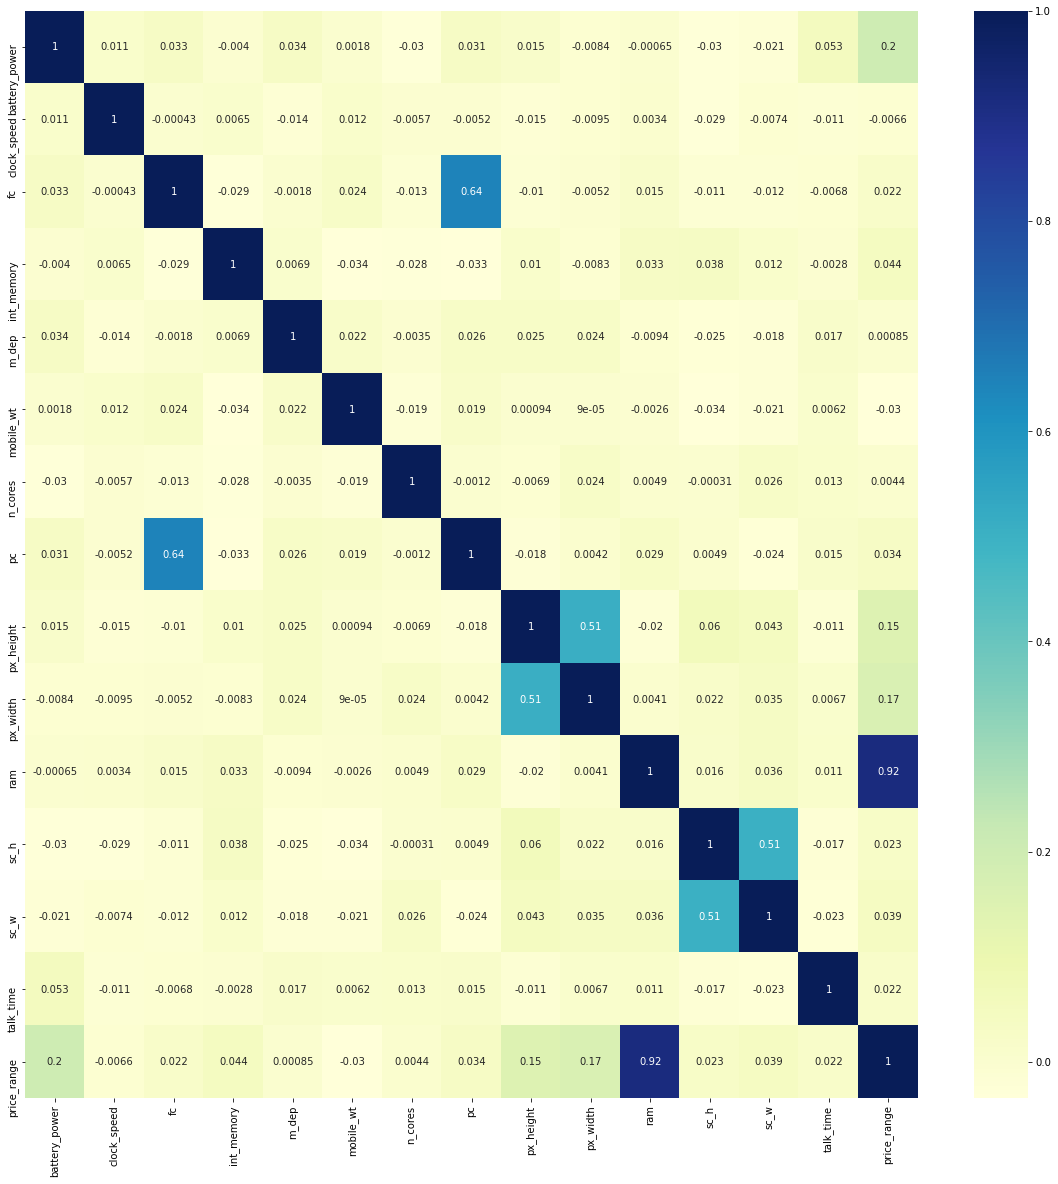

In [12]:
# Plotting a heatmap between the variables of dataset
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap = 'YlGnBu',annot=True)
plt.show()

### <u>Insights:</u>
- As seen from heatmap, `ram` (RAM) is highly correlated with target variable price_range
- This variable is the most significant variable for classification

- We also see that `pc` (Primary Camera) and `fc` (Front Camera) are highly correlated

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

### RAM v Price Range

<AxesSubplot:xlabel='price_range', ylabel='ram'>

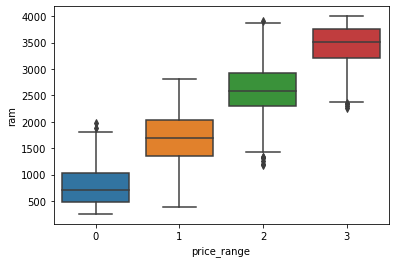

In [13]:
sns.boxplot(x='price_range',y='ram',data=data)

### <u>Insights:</u>
- As seen from heatmap, `ram` (RAM) is highly correlated with target variable price_range
- This variable is the most significant variable for classification

- We see higher the Ram higher is the price_range of the mobile

#### Battery v Price_range

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

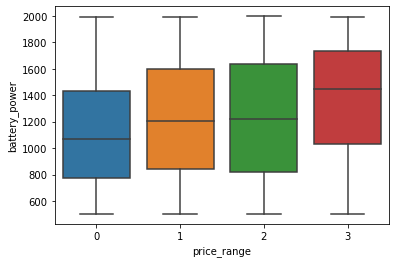

In [14]:
sns.boxplot(x='price_range',y='battery_power',data=data)

### <u>Insights:</u>
- As seen from boxplot, high prie range phones have high battery power capacity. But we have less correlation between the two variables as we have sample of dataset

#### Screen width v height

<AxesSubplot:xlabel='sc_h', ylabel='sc_w'>

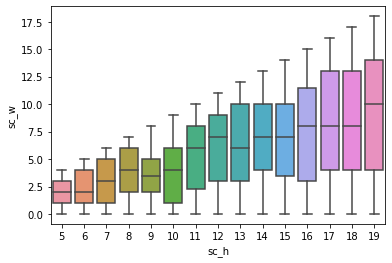

In [15]:
sns.boxplot(x='sc_h',y='sc_w',data=data)

### <u>Insights:</u>
- As seen from boxplot, the screen width increases as the height increases

#### Clock-speed v price-range

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

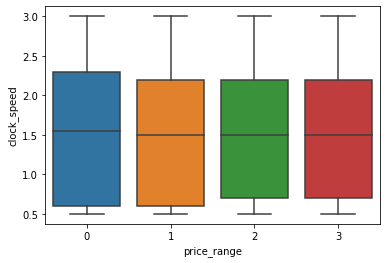

In [16]:
sns.boxplot(data['price_range'],data['clock_speed'])

### <u>Insights:</u>
- As seen from boxplot, Variance of clock speed is slightly more for mobiles in Category '0'

#### No of core v price-range

In [17]:
print("Unique values for No of Cores : {}".format(np.sort(data['n_cores'].unique())))

Unique values for No of Cores : [1 2 3 4 5 6 7 8]


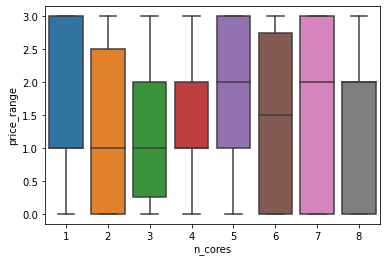

In [18]:
sns.boxplot(data['n_cores'],data['price_range'])
plt.show()

In [19]:
print("Count of data having Core >=7 and price-range of 3 is {}".format(data.loc[(data['price_range']==3) & (data['n_cores']>=7)]['n_cores'].count()))

Count of data having Core >=7 and price-range of 3 is 128


### <u>Insights:</u>
- As seen from boxplot, we have a good spread of data for number of cores

### <U>Data Preparation<U>

We usually create a binary map for categorcal data in this step but as in this case-study we do not have any categorical data we shall be skipping this step and move ahead.

Incase, we had some categorical data - that would be handeled using the map function or getDummies method or LabelEncoder

### <U>Splitting the Data into Training and Testing Sets<U>

##### <u>Step 1 :</u> 
    - We shall seperate the X and Y variables

In [20]:
# Creating X and Y numpy arrays before we split
X = data.iloc[:,0:-1].values
Y = data.iloc[:,-1].values

##### <u>Step 2 :</u> 
    - Scaling the Data

Scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use StandardScaler scaling.

In [21]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

##### <u>Step 3 :</u> 
    - Splitting the data using train_test_split

Let us divide the dataframe df into 70/30 ratio

In [22]:
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [23]:
print("X_train - shape : ",X_train.shape)
print("Y_train - shape : ",Y_train.shape)
print("X_test  - shape : ",X_test.shape)
print("Y_test  - shape : ",Y_test.shape)

X_train - shape :  (1400, 14)
Y_train - shape :  (1400,)
X_test  - shape :  (600, 14)
Y_test  - shape :  (600,)


### <u>Building a model & training it<u>

In [24]:
k = int(np.sqrt(len(X_train)))

print("K-neighbors selected in initial model building phase is {}".format(k))

K-neighbors selected in initial model building phase is 37


In [25]:
model_KNN = KNeighborsClassifier(n_neighbors = k, metric = "manhattan")
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=37)

### <u>Predict test values using model<u>

In [26]:
Y_pred = model_KNN.predict(X_test)

### <u>Evaluating the predictions made by model<u>

#### Accuracy Score

In [27]:
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Accuracy of the model:  0.7183333333333334


#### Classification Report

In [28]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       140
           1       0.66      0.59      0.63       157
           2       0.61      0.66      0.63       157
           3       0.83      0.75      0.79       146

    accuracy                           0.72       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.72      0.72      0.72       600



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

#### Confusion Matrix

#### <u> Method 1 - Using sklearn.metrics</u>

In [29]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

[[125  15   0   0]
 [ 34  93  30   0]
 [  1  31 103  22]
 [  0   1  35 110]]


#### <u>Visualize using seaborn</u>

Text(0.5, 69.0, 'Predicted label')

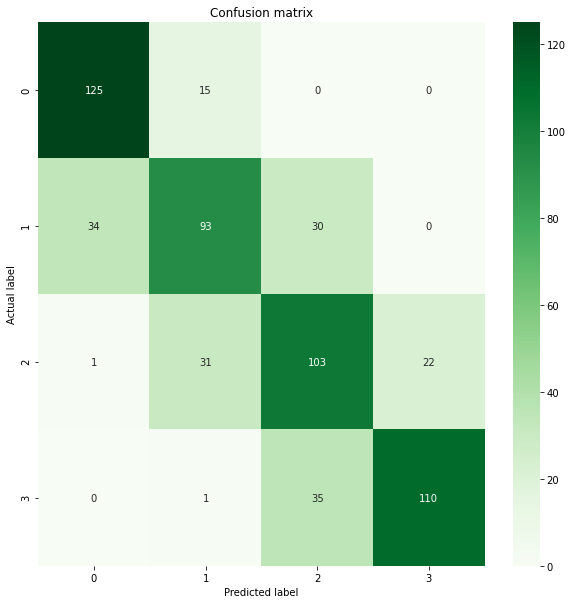

In [30]:
plt.figure(figsize=(10,10))
p = sns.heatmap(pd.DataFrame(cfm), annot=True, cmap="Greens" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### <u> Method 2 - Using Pandas crosstab</u>

In [31]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,All
True,,,,,
0,125,15,0,0,140
1,34,93,30,0,157
2,1,31,103,22,157
3,0,1,35,110,146
All,160,140,168,132,600


##### Confusion Matrix : 

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

    In the famous cancer example:
    Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.
    Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.
    Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.
    Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.


    For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

### <u>Evaluation Insights:</u>

    Class => recall
  
       0  =>  0.89
       1  =>  0.59
       2  =>  0.66
       3  =>  0.75

   - We see that Class 0 and 3 have a high recall value and hence we can say that the model has high accuracy predicting class 0 and 3
   - Comparitavely, Class 1 has the lowest re-call value and model has the most error in predicting the values for class 1

In [32]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,All
True,,,,,
0,125,15,0,0,140
1,34,93,30,0,157
2,1,31,103,22,157
3,0,1,35,110,146
All,160,140,168,132,600


- 125 values for class 0 has been predicted correctly out of 140, falsely classified 15 values as class 1
-  93 values for class 1 has been predicted correctly out of 157, falsely classified 34 values as class 0 & 30 as class 2
- 103 values for class 2 has been predicted correctly out of 157, falsely classified 31 values as class 1 & 22 as class 2
- 110 values for class 3 has been predicted correctly out of 146, falsely classified  1 values as class 1 & 35 as class 2

The model accuracy is found to be 71.83%, which we can say by looking at the confusion matrix that it is doing a good job predicting class  and class 3.

- We need to improve the model in classifying class 1 values. We shall tune the model and see if th accuracy increases

### <u>Tuning the Model to increase the accuracy and reduce false predictionl<u>

#### Finding the best possible value for K

In [33]:
# Generic Code Block

neighbors = np.arange(1,41)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
my_dict = {}

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)
    
    #Predict 
    Y_pred = knn.predict(X_test)
    
    # Zipping Accuracy score
    my_dict[k]=accuracy_score(Y_test,Y_pred)
    
print(my_dict)

{1: 0.5216666666666666, 2: 0.5066666666666667, 3: 0.5583333333333333, 4: 0.5983333333333334, 5: 0.6116666666666667, 6: 0.62, 7: 0.6216666666666667, 8: 0.66, 9: 0.6516666666666666, 10: 0.665, 11: 0.6683333333333333, 12: 0.685, 13: 0.6866666666666666, 14: 0.7, 15: 0.7116666666666667, 16: 0.7083333333333334, 17: 0.705, 18: 0.695, 19: 0.6883333333333334, 20: 0.69, 21: 0.7016666666666667, 22: 0.7116666666666667, 23: 0.72, 24: 0.7116666666666667, 25: 0.72, 26: 0.72, 27: 0.7183333333333334, 28: 0.7033333333333334, 29: 0.7216666666666667, 30: 0.7166666666666667, 31: 0.715, 32: 0.7216666666666667, 33: 0.7183333333333334, 34: 0.7316666666666667, 35: 0.72, 36: 0.7166666666666667, 37: 0.7183333333333334, 38: 0.73, 39: 0.7266666666666667, 40: 0.72}


#### Plotting Model accuracy for training data and testing data

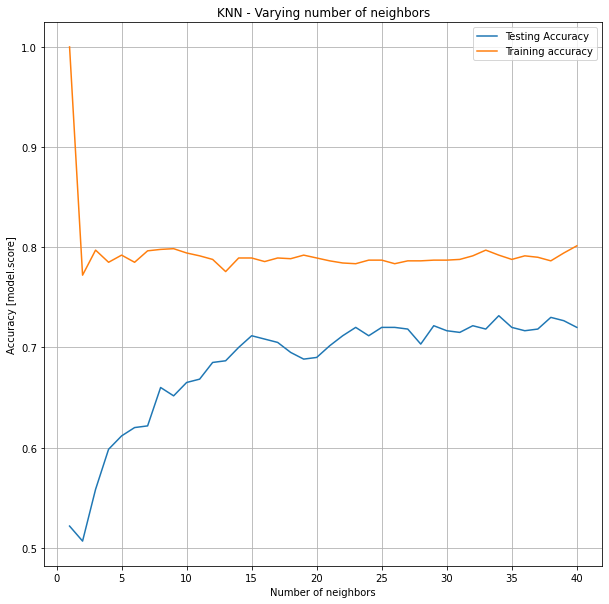

In [34]:
#Generate plot
plt.figure(figsize=(10,10))
plt.title('KNN - Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy [model.score]')
plt.legend()
plt.grid()
plt.show()

### <u>Insights:</u>
- As seen from the graph, with more number of neighbours the accuracy increases
- The test and train data tend to reach the same accuracy with more neighbors

#### Plotting of neighbors v accuracy score of sklearn.metrics

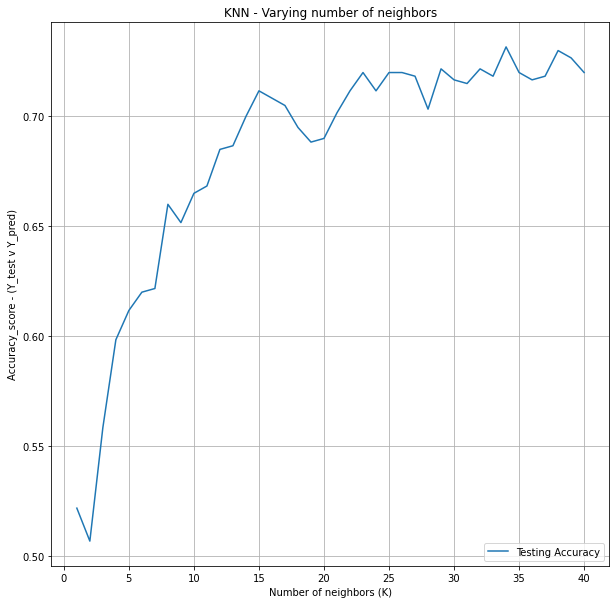

In [35]:
#Generate plot
plt.figure(figsize=(10,10))
plt.title('KNN - Varying number of neighbors')
plt.plot(my_dict.keys(),my_dict.values(), label='Testing Accuracy')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Accuracy_score - (Y_test v Y_pred)')
plt.grid()
plt.legend(loc=4)
plt.show()

### <u>Insights:</u>
- As seen from the graph, with more number of neighbours the accuracy increases
- After a point the accuracy more or less remains stable with increase in the neighbors

In [36]:
print("K with maximum accuracy is {}".format(max(my_dict, key=my_dict.get)))

K with maximum accuracy is 34


### Rebuilding the model with K value of 34 and checking the accuracy and confusion matix

In [37]:
model_KNN = KNeighborsClassifier(n_neighbors = 34, metric = "manhattan")
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=34)

In [38]:
Y_pred = model_KNN.predict(X_test)

In [39]:
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Accuracy of the model:  0.7316666666666667


In [40]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,All
True,,,,,
0,128,12,0,0,140
1,30,96,31,0,157
2,1,30,103,23,157
3,0,0,34,112,146
All,159,138,168,135,600


- we see that there is a slight increase in prediction for class 0, 1 and 3 with the newest K value. Hence the accuracy of the model increases

#### We further try to check accuracy of the model with K value of 34 and metric of euclidean and minkowski

##### <u>Euclidean</u>

In [41]:
model_KNN = KNeighborsClassifier(n_neighbors = 34, metric = "euclidean")
                                 
model_KNN.fit(X_train,Y_train)
                                 
Y_pred = model_KNN.predict(X_test)

In [42]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[121  18   1   0]
 [ 45  74  38   0]
 [  2  25 105  25]
 [  0   2  45  99]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       140
           1       0.62      0.47      0.54       157
           2       0.56      0.67      0.61       157
           3       0.80      0.68      0.73       146

    accuracy                           0.67       600
   macro avg       0.67      0.67      0.67       600
weighted avg       0.67      0.67      0.66       600

Accuracy of the model:  0.665


##### <u>minkowski</u>

In [43]:
model_KNN = KNeighborsClassifier(n_neighbors = 34, metric = "minkowski")
                                 
model_KNN.fit(X_train,Y_train)
                                 
Y_pred = model_KNN.predict(X_test)

In [44]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[121  18   1   0]
 [ 45  74  38   0]
 [  2  25 105  25]
 [  0   2  45  99]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       140
           1       0.62      0.47      0.54       157
           2       0.56      0.67      0.61       157
           3       0.80      0.68      0.73       146

    accuracy                           0.67       600
   macro avg       0.67      0.67      0.67       600
weighted avg       0.67      0.67      0.66       600

Accuracy of the model:  0.665


### <font color=blue><u>FINAL REPORT<u>

- we conclude that with K value of 34 and metric as manhattan, the model attains the highest accuracy than eclidean and minkowski

### <font color=blue> <u>Closing Statement</u>

- The model is good enough to predict which explains the price_range of mobile upto 73.1% which is quite a good digit to conclude upon that the model is significant.

- The Prediction and accuracy could be further increased by using other ML models

# <font color=brown><center>-----------------------------END-----------------------------<center>

### <font color=blue> <u>Bonus - Attaining max accuracy using SVM - SVC</u>

# SVM

In [45]:
from sklearn.svm import SVC

svc_model = SVC(kernel = "rbf", C = 1, gamma = 0.1)
svc_model.fit(X_train, Y_train)
Y_pred = svc_model.predict(X_test)
#print(list(Y_pred))

In [46]:
svc_model.score(X_train,Y_train)

0.9878571428571429

In [47]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

[[129  11   0   0]
 [  8 132  17   0]
 [  0  17 130  10]
 [  0   0  18 128]]


In [48]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,All
True,,,,,
0,129,11,0,0,140
1,8,132,17,0,157
2,0,17,130,10,157
3,0,0,18,128,146
All,137,160,165,138,600


In [49]:
print("Classification report: \n")
print(classification_report(Y_test,Y_pred))

Classification report: 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       140
           1       0.82      0.84      0.83       157
           2       0.79      0.83      0.81       157
           3       0.93      0.88      0.90       146

    accuracy                           0.86       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.86      0.87       600



In [50]:
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

Accuracy of the model:  0.865


- We see that prediction for Class 1 & 2 have increased
- the model accuracy is 86.5%
- If we further tune the SVC model by changing the hyper-parameters we may attain an increase in the accuracy score and an increased prediction of classes